# 0.) Import and Clean data

In [1]:
import pandas as pd
#from google.colab import drive
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import plot_tree
from sklearn.metrics import confusion_matrix
import seaborn as sns

In [ ]:
#drive.mount('/content/gdrive/', force_remount = True)

Mounted at /content/gdrive/


In [4]:
df = pd.read_csv("bank-additional-full.csv", sep = ';')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [5]:
df = df.drop(["default", "pdays",	"previous",	"poutcome",	"emp.var.rate",	"cons.price.idx",	"cons.conf.idx",	"euribor3m",	"nr.employed"], axis = 1)
df = pd.get_dummies(df, columns = ["loan", "job","marital","housing","contact","day_of_week", "campaign", "month", "education"],drop_first = True)
df.head()

,age,duration,y,loan_unknown,loan_yes,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,...,month_nov,month_oct,month_sep,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown
0,56,261,no,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,57,149,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
2,37,226,no,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
3,40,151,no,False,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
4,56,307,no,False,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False


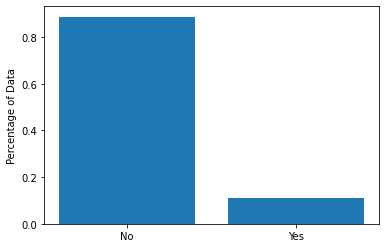

In [6]:
y = pd.get_dummies(df["y"], drop_first = True)
X = df.drop(["y"], axis = 1)
obs = len(y)
plt.bar(["No","Yes"],[len(y[y.yes==0])/obs,len(y[y.yes==1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

In [8]:
# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, random_state = 42)
scaler = StandardScaler().fit(X_train)

X_scaled = scaler.transform(X_train)
X_test = scaler.transform(X_test)

#1.) Based on the visualization above, use your expert opinion to transform the data based on what we learned this quarter

In [10]:
###############
###TRANSFORM###
###############
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler()
X_scaled, y_train = ros.fit_resample(X_train, y_train)

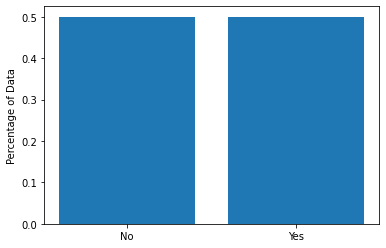

In [11]:
obs = len(y_train)
plt.bar(["No","Yes"],[len(y_train [y_train.yes == 0])/
                      obs,len(y_train [y_train.yes == 1])/obs])
plt.ylabel("Percentage of Data")
plt.show()

# 2.) Build and visualize a decision tree of Max Depth 3. Show the confusion matrix.

In [12]:
dtree_main = DecisionTreeClassifier(max_depth = 3)
dtree_main.fit(X_scaled, y_train)

DecisionTreeClassifier(max_depth=3)

[Text(0.5, 0.875, 'duration <= 250.5\ngini = 0.5\nsamples = 51160\nvalue = [25580, 25580]\nclass = No'),
 Text(0.25, 0.625, 'duration <= 136.5\ngini = 0.382\nsamples = 24330\nvalue = [18084, 6246]\nclass = No'),
 Text(0.125, 0.375, 'month_mar <= 0.5\ngini = 0.217\nsamples = 11987\nvalue = [10500, 1487]\nclass = No'),
 Text(0.0625, 0.125, 'gini = 0.188\nsamples = 11620\nvalue = [10400, 1220]\nclass = No'),
 Text(0.1875, 0.125, 'gini = 0.396\nsamples = 367\nvalue = [100, 267]\nclass = Yes'),
 Text(0.375, 0.375, 'contact_telephone <= 0.5\ngini = 0.474\nsamples = 12343\nvalue = [7584, 4759]\nclass = No'),
 Text(0.3125, 0.125, 'gini = 0.499\nsamples = 8887\nvalue = [4587, 4300]\nclass = No'),
 Text(0.4375, 0.125, 'gini = 0.23\nsamples = 3456\nvalue = [2997, 459]\nclass = No'),
 Text(0.75, 0.625, 'duration <= 524.5\ngini = 0.403\nsamples = 26830\nvalue = [7496, 19334]\nclass = Yes'),
 Text(0.625, 0.375, 'contact_telephone <= 0.5\ngini = 0.483\nsamples = 14156\nvalue = [5757, 8399]\nclass = Y

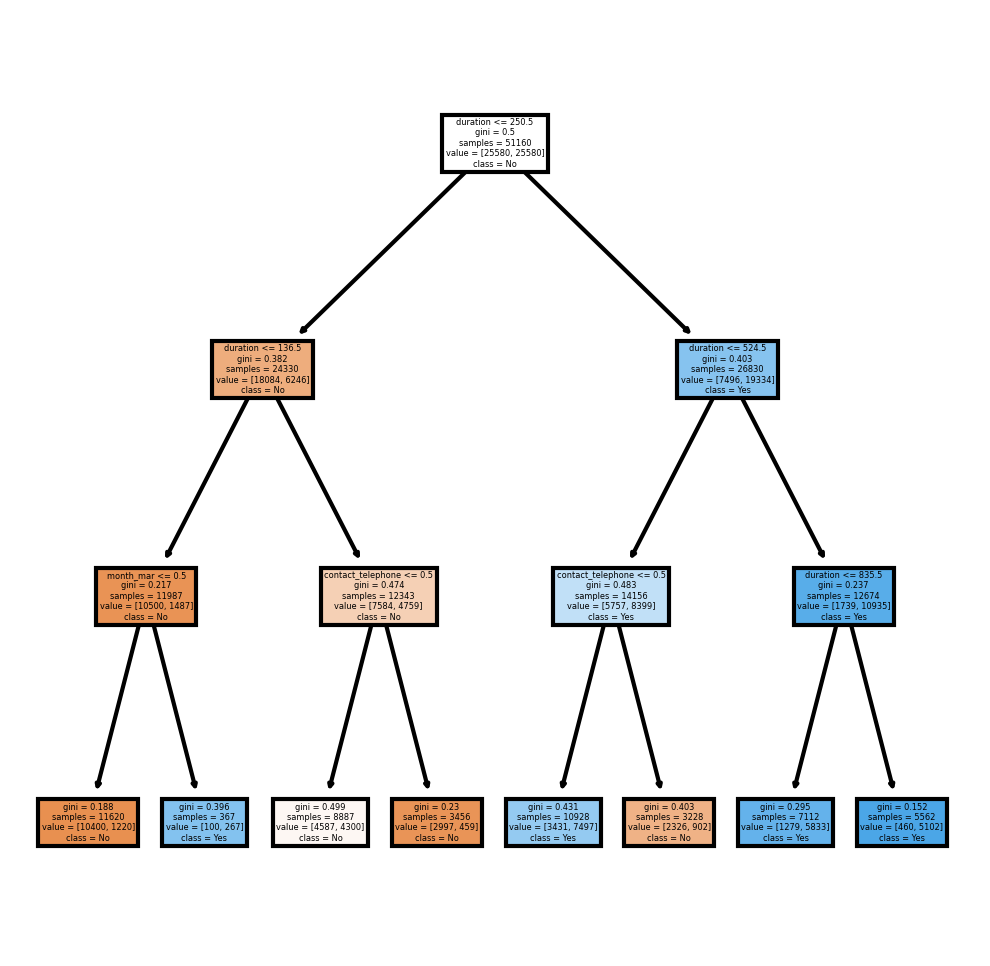

In [13]:
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
plot_tree(dtree_main, filled = True, feature_names = X.columns, class_names = ["No","Yes"])
#fig.savefig('imagename.png')

# 1b.) Confusion matrix on out of sample data. Visualize and store as variable

C:\Users\Ann Tontiwachw\anaconda3\envs\new_environment\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


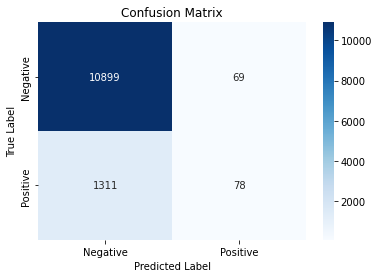

In [15]:
y_pred = dtree_main.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)

class_labels = ['Negative', 'Positive']

# Plot the confusion matrix as a heatmap
sns.heatmap(cm_raw, annot = True, fmt = 'd', cmap = 'Blues', 
            xticklabels = class_labels, yticklabels = class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 3.) Use bagging on your descision tree

C:\Users\Ann Tontiwachw\anaconda3\envs\new_environment\lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Ann Tontiwachw\anaconda3\envs\new_environment\lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but BaggingClassifier was fitted with feature names
  warnings.warn(


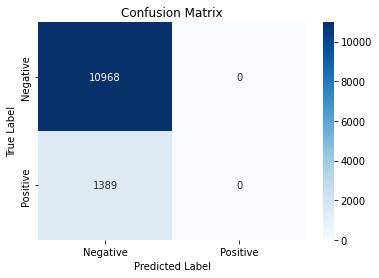

In [16]:
# Optimized on Max Depth
dtree = DecisionTreeClassifier(max_depth = 3)
bagging = BaggingClassifier(estimator = dtree,
                 n_estimators = 100,
                 max_samples = .5, # To maximize the GridSearchCV
                 max_features = 1.)
bagging.fit(X_scaled, y_train)
y_pred = bagging.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)
sns.heatmap(cm_raw, annot = True, fmt = 'd', cmap = 'Blues', 
            xticklabels = class_labels, yticklabels = class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# 4.) Boost your tree

C:\Users\Ann Tontiwachw\anaconda3\envs\new_environment\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


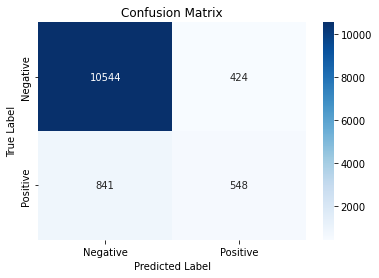

In [19]:
from sklearn.ensemble import AdaBoostClassifier
dtree = DecisionTreeClassifier(max_depth = 3)
boost = AdaBoostClassifier(estimator = dtree,
                 n_estimators = 100)
boost.fit(X_scaled, y_train)
y_pred = boost.predict(X_test)
y_true = y_test
cm_raw = confusion_matrix(y_true, y_pred)
sns.heatmap(cm_raw, annot = True, fmt = 'd', cmap = 'Blues', xticklabels = class_labels, yticklabels = class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

Answer: The boosting does significantly better job in every category than decisiontree and bagging methods.

# 5.) Train a Logistic Regression on Decision Tree, Boosted Tree and the Bagged Tree. Interpret Coefficients and Significance.

In [60]:
from sklearn.linear_model import LogisticRegression
X_base_learners = [list(bagging.predict(X_scaled)), 
                   list(boost.predict(X_scaled)), list(dtree_main.predict(X_scaled))]
X_base_learners = np.array(X_base_learners).transpose()
super_learner = LogisticRegression()
super_learner.fit(X_base_learners, y_train)
super_learner.coef_

C:\Users\Ann Tontiwachw\anaconda3\envs\new_environment\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 0.92487425,  3.44062837, -0.08437789]])

Answer: Given its performance as mentioned prior, Boosting yields the most weight relative to the rest (3.44).